In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
car=pd.read_csv('car.csv')

In [3]:
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [4]:
car.shape

(892, 6)

In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 21.0+ KB


In [6]:
car['year'].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

In [7]:
car.isnull().sum().sort_values(ascending=False)

fuel_type     55
kms_driven    52
name           0
company        0
year           0
Price          0
dtype: int64

# Cleaning

In [8]:
backup=car.copy()

In [9]:
car=car[car['year'].str.isnumeric()]

In [12]:
car['year'].unique()

array([2007, 2006, 2018, 2014, 2015, 2012, 2013, 2016, 2010, 2017, 2008,
       2011, 2019, 2009, 2005, 2000, 2003, 2004, 1995, 2002, 2001])

In [13]:
car['year']=car['year'].astype(int)

In [14]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 842 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        842 non-null    object
 1   company     842 non-null    object
 2   year        842 non-null    int32 
 3   Price       842 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: int32(1), object(5)
memory usage: 26.3+ KB


In [17]:
#car['Price'].unique()

In [18]:
car=car[car['Price']!='Ask For Price']

In [19]:
car['Price']# remove ,

0        80,000
1      4,25,000
3      3,25,000
4      5,75,000
6      1,75,000
         ...   
886    3,00,000
888    2,60,000
889    3,90,000
890    1,80,000
891    1,60,000
Name: Price, Length: 819, dtype: object

In [20]:
car['Price']=car['Price'].str.replace(',','').astype(int)

In [21]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 819 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        819 non-null    object
 1   company     819 non-null    object
 2   year        819 non-null    int32 
 3   Price       819 non-null    int32 
 4   kms_driven  819 non-null    object
 5   fuel_type   816 non-null    object
dtypes: int32(2), object(4)
memory usage: 25.6+ KB


In [22]:
car['kms_driven']

0        45,000 kms
1            40 kms
3        28,000 kms
4        36,000 kms
6        41,000 kms
           ...     
886    1,32,000 kms
888      27,000 kms
889      40,000 kms
890          Petrol
891          Petrol
Name: kms_driven, Length: 819, dtype: object

In [25]:
car['kms_driven'].str.split(' ')

0        [45,000, kms]
1            [40, kms]
3        [28,000, kms]
4        [36,000, kms]
6        [41,000, kms]
            ...       
886    [1,32,000, kms]
888      [27,000, kms]
889      [40,000, kms]
890           [Petrol]
891           [Petrol]
Name: kms_driven, Length: 819, dtype: object

In [26]:
car['kms_driven']=car['kms_driven'].str.split(' ').str.get(0).str.replace(',','')

In [27]:
car=car[car['kms_driven'].str.isnumeric()]

In [28]:
car.shape

(817, 6)

In [29]:
car['kms_driven']=car['kms_driven'].astype(int)

In [30]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        817 non-null    object
 1   company     817 non-null    object
 2   year        817 non-null    int32 
 3   Price       817 non-null    int32 
 4   kms_driven  817 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 25.5+ KB


In [31]:
car['fuel_type']=car['fuel_type'].fillna(car['fuel_type'].mode())

In [32]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz VXI ABS,Maruti,2011,270000,50000,Petrol
885,Tata Indica V2 DLE BS III,Tata,2009,110000,30000,Diesel
886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
888,Tata Zest XM Diesel,Tata,2018,260000,27000,Diesel


In [33]:
car.isnull().sum().sort_values(ascending=False)

fuel_type     1
name          0
company       0
year          0
Price         0
kms_driven    0
dtype: int64

In [34]:
car=car[~car['fuel_type'].isna()]

In [37]:
car['name'].str.split(' ').str.slice(0,3)

0         [Hyundai, Santro, Xing]
1         [Mahindra, Jeep, CL550]
3           [Hyundai, Grand, i10]
4      [Ford, EcoSport, Titanium]
6                    [Ford, Figo]
                  ...            
883        [Maruti, Suzuki, Ritz]
885            [Tata, Indica, V2]
886      [Toyota, Corolla, Altis]
888              [Tata, Zest, XM]
889        [Mahindra, Quanto, C8]
Name: name, Length: 816, dtype: object

In [38]:
car['name']=car['name'].str.split(' ').str.slice(0,3).str.join(' ')

<ipython-input-38-6fe3ca63fc43>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car['name']=car['name'].str.split(' ').str.slice(0,3).str.join(' ')


In [39]:
car=car.reset_index(drop=True)

In [40]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [41]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int32 
 3   Price       816 non-null    int32 
 4   kms_driven  816 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 19.2+ KB


## EDA(Exploratory data analysis )

C:\Users\91993\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


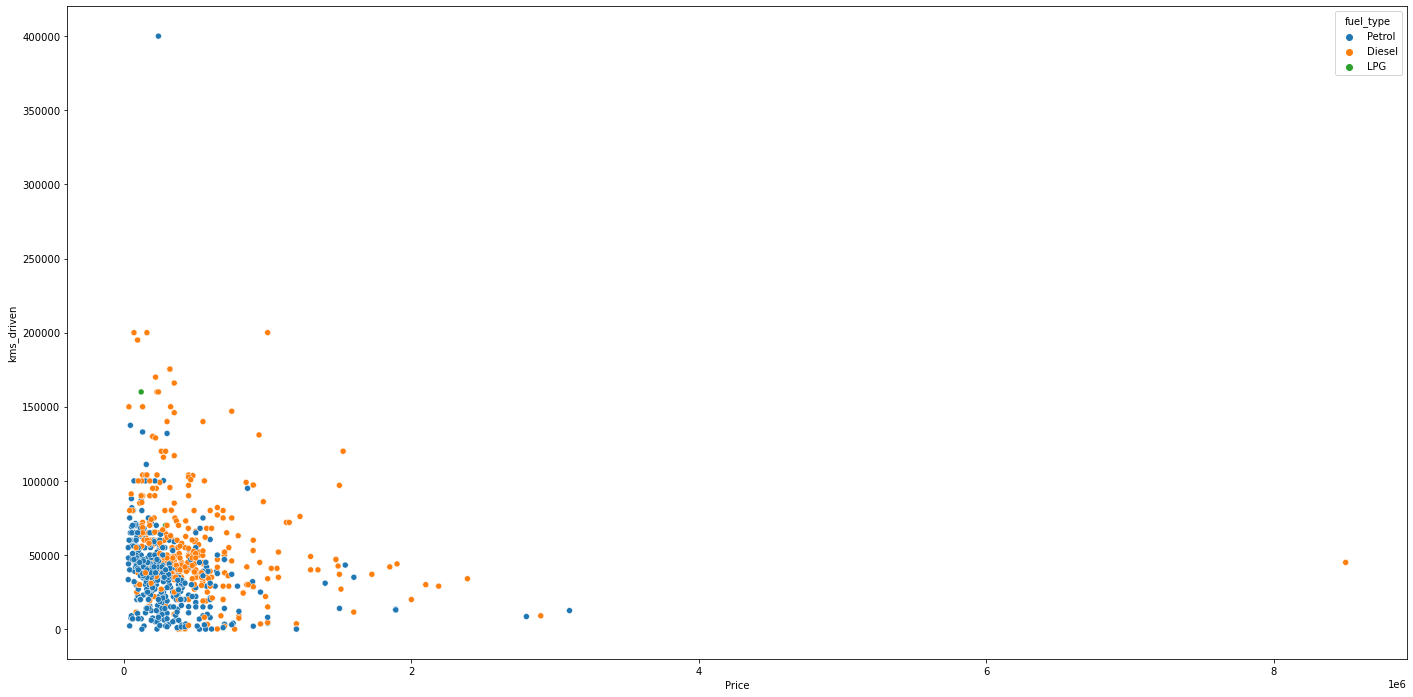

In [43]:
import seaborn as sns
plt.figure(figsize=(24,12))
sns.scatterplot(car['Price'],car['kms_driven'],hue=car['fuel_type'],);
#                style=car['year'],size=car['company']);

C:\Users\91993\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fuel_type', ylabel='Price'>

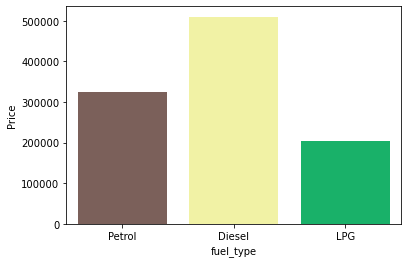

In [44]:
sns.barplot(car['fuel_type'],car['Price'],palette="terrain_r",ci=False)#,hue=car['company'])

C:\Users\91993\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


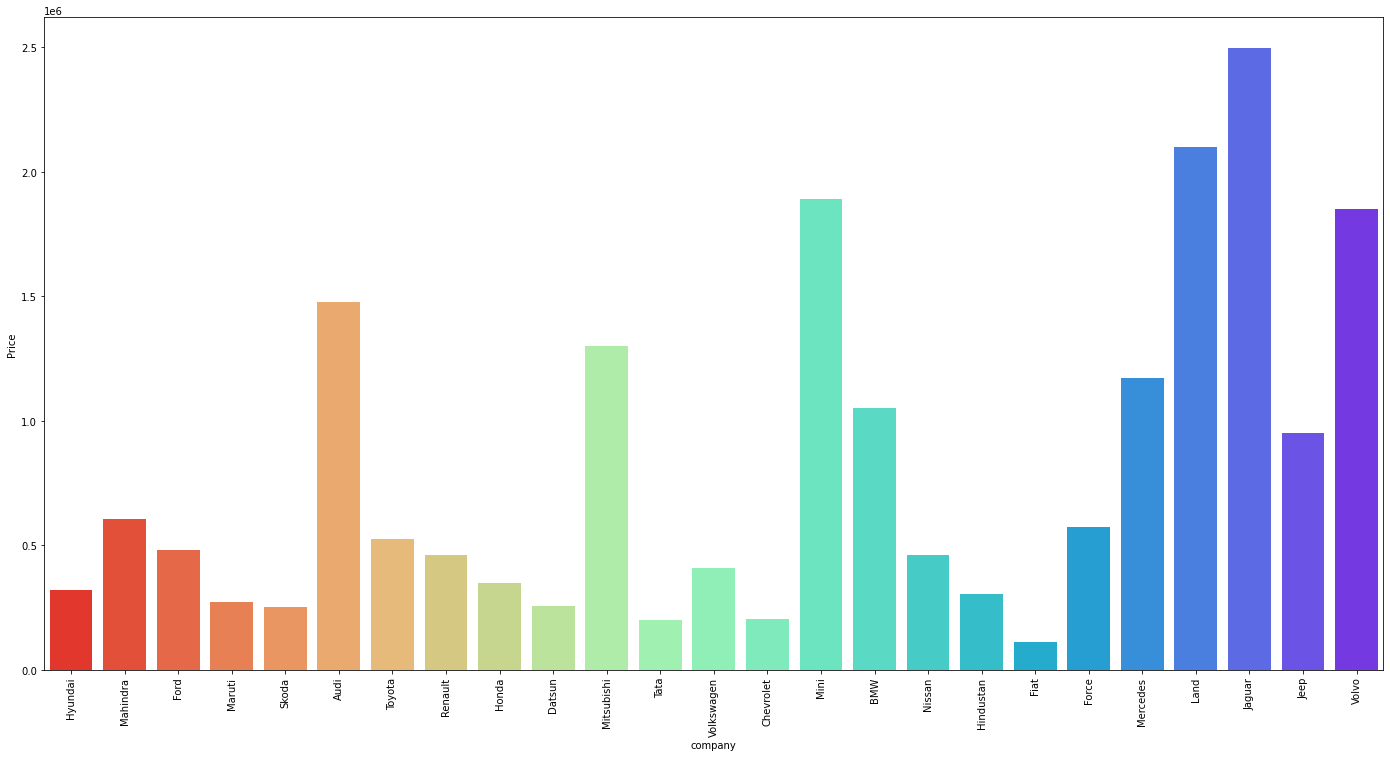

In [45]:
plt.figure(figsize=(24,12))
sns.barplot(car['company'],car['Price'],palette="rainbow_r",ci=False)
plt.xticks(rotation='vertical')
plt.show()

C:\Users\91993\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fuel_type', ylabel='Price'>

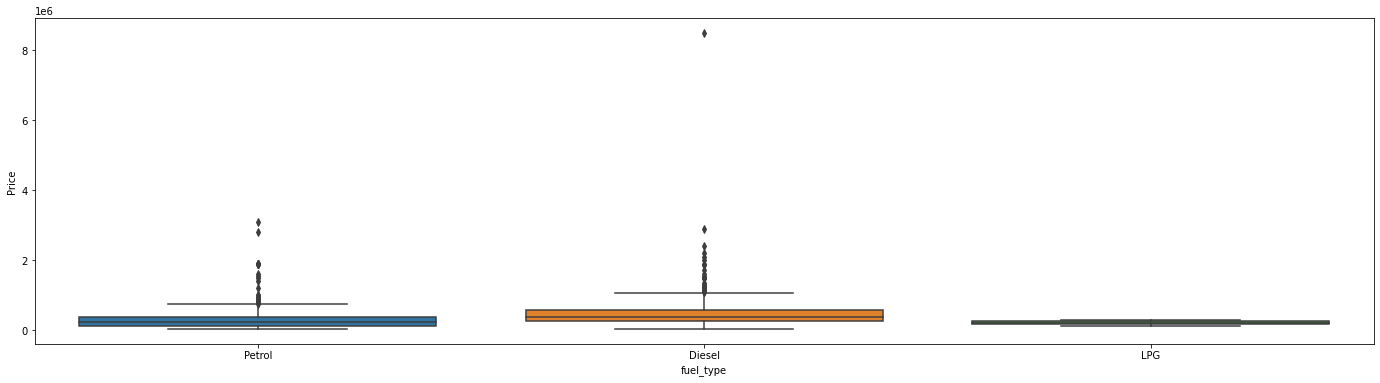

In [46]:
plt.figure(figsize=(24,6))
sns.boxplot(car['fuel_type'],car['Price'])#,hue=titanic['Survived'])

C:\Users\91993\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\91993\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\91993\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

<AxesSubplot:xlabel='Price', ylabel='Density'>

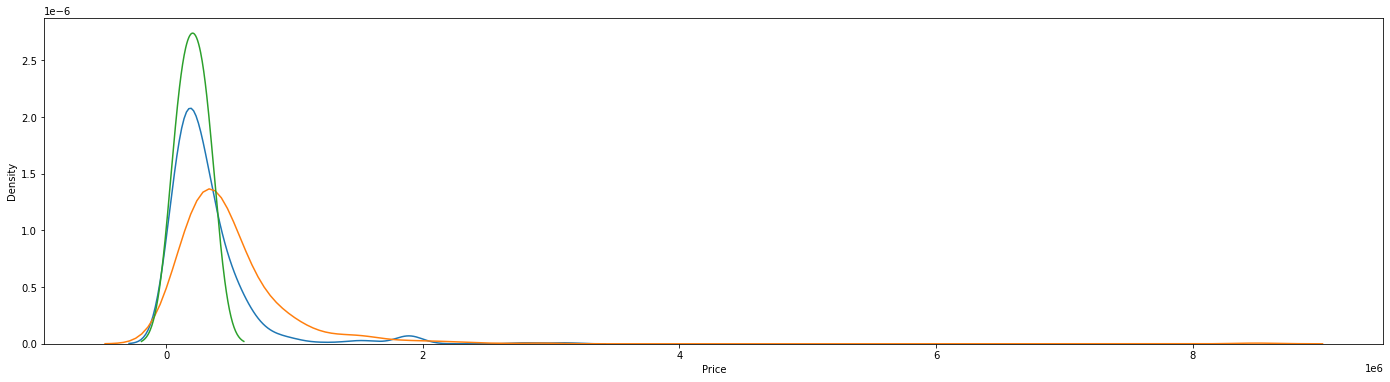

In [47]:
plt.figure(figsize=(24,6))
sns.distplot(car[car['fuel_type']=='Petrol']['Price'],hist=False)
sns.distplot(car[car['fuel_type']=='Diesel']['Price'],hist=False)
sns.distplot(car[car['fuel_type']=='LPG']['Price'],hist=False)

C:\Users\91993\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91993\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91993\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='Price', ylabel='Density'>

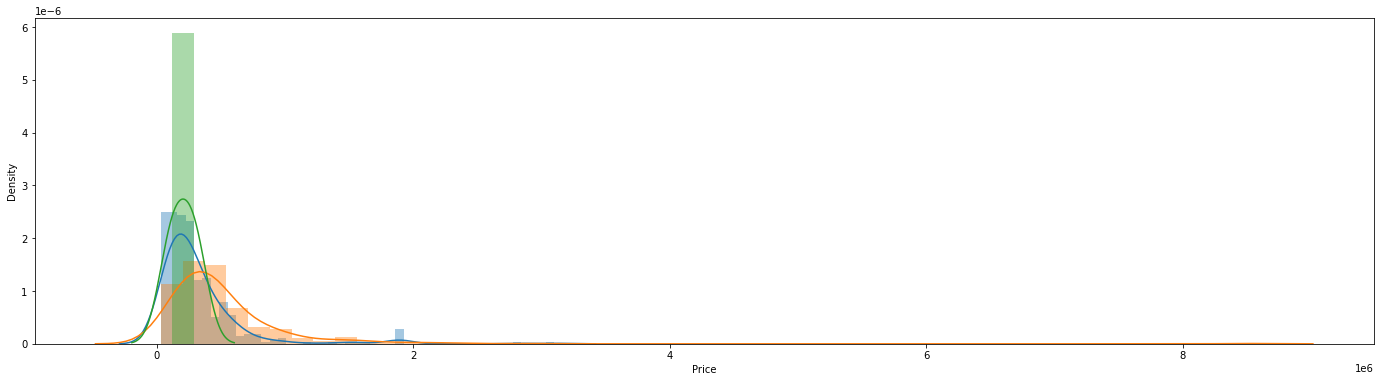

In [48]:
plt.figure(figsize=(24,6))
sns.distplot(car[car['fuel_type']=='Petrol']['Price'])
sns.distplot(car[car['fuel_type']=='Diesel']['Price'])
sns.distplot(car[car['fuel_type']=='LPG']['Price'])

<AxesSubplot:>

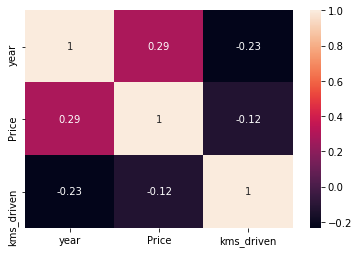

In [49]:
sns.heatmap(car.corr(),annot=True)

<AxesSubplot:xlabel='fuel_type', ylabel='company'>

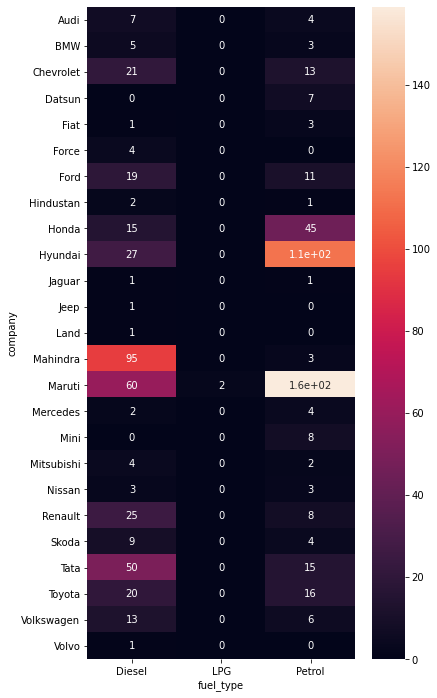

In [50]:
plt.figure(figsize=(6,12))
sns.heatmap(pd.crosstab(car['company'],car['fuel_type']),annot=True)

<AxesSubplot:xlabel='fuel_type'>

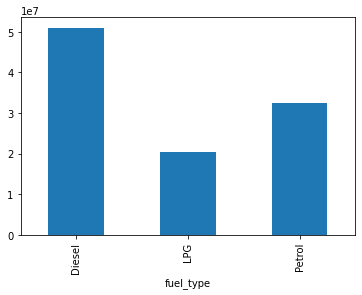

In [51]:
(car.groupby('fuel_type').mean()['Price']*100).plot(kind='bar')

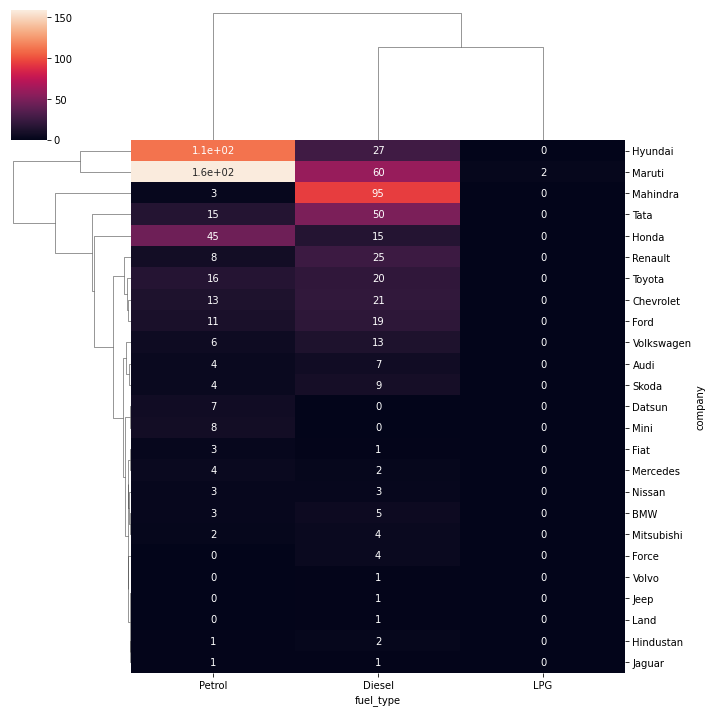

In [52]:
sns.clustermap(pd.crosstab(car['company'],car['fuel_type']),annot=True)

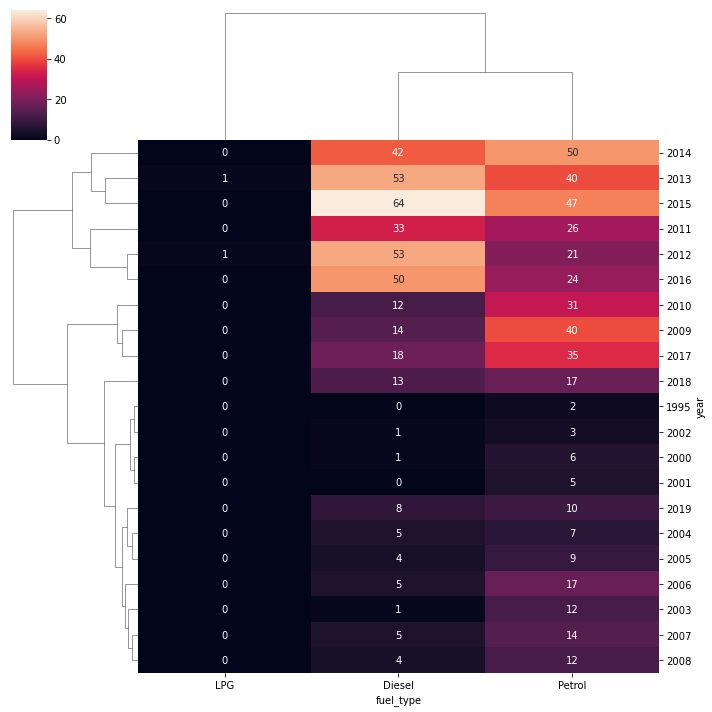

In [53]:
sns.clustermap(pd.crosstab(car['year'],car['fuel_type']),annot=True)

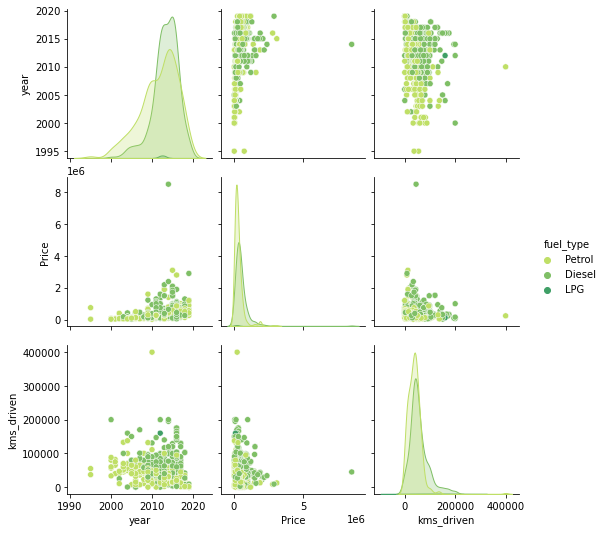

In [54]:
sns.pairplot(car,hue='fuel_type',palette='summer_r')

C:\Users\91993\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='Price'>

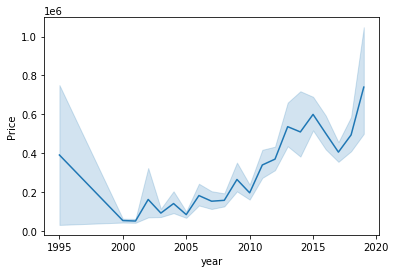

In [55]:
sns.lineplot(car['year'],car['Price'])

In [56]:
car.describe()

,year,Price,kms_driven
count,816.000000,8.160000e+02,816.000000
mean,2012.444853,4.117176e+05,46275.531863
std,4.002992,4.751844e+05,34297.428044
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.912500e+05,56818.500000
max,2019.000000,8.500003e+06,400000.000000


In [57]:
car=car[car['Price']<6e6].reset_index(drop=True)

In [ ]:
car.to_csv('Cleaned_car.csv')

# Model

In [58]:
X=car.drop('Price',axis=1)
y=car['Price']

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=661)

# hypothesis testing 

In [60]:
# 1) Test Null Average kms_driven of fuel_type equal?
# 2) Test Null Average kms_driven of fuel_type equal?
# groupby(), Null & Alt , split dataframe, ttest_ind, infer

In [61]:
X_train.kms_driven.groupby(X_train.fuel_type).mean()

fuel_type
Diesel    55385.286174
LPG       70000.000000
Petrol    37609.861765
Name: kms_driven, dtype: float64

In [62]:
X_train.kms_driven.groupby(X_train.fuel_type).var()

fuel_type
Diesel    1.298526e+09
LPG                NaN
Petrol    8.922084e+08
Name: kms_driven, dtype: float64

In [63]:
from scipy.stats import f_oneway

In [64]:
rating1=X_train[X_train.fuel_type=="Diesel"]
rating2=X_train[X_train.fuel_type=="LPG"]
rating3=X_train[X_train.fuel_type=="Petrol"]


In [65]:
f_oneway(rating1.kms_driven,rating2.kms_driven,
        rating3.kms_driven)
# pvalue=8.333160441335796e-12 < 0.05 Reject Null hypothises

F_onewayResult(statistic=23.884815428668457, pvalue=9.793870537528477e-11)

In [66]:
# Test Null No Association between fuel_type and company
# Test Null No Association between fuel_type and company

In [67]:
X_train.columns

Index(['name', 'company', 'year', 'kms_driven', 'fuel_type'], dtype='object')

In [68]:
pd.crosstab(X_train.fuel_type,X_train.company)

company,Audi,BMW,Chevrolet,Datsun,Fiat,Force,Ford,Hindustan,Honda,Hyundai,...,Mercedes,Mini,Mitsubishi,Nissan,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
fuel_type,,,,,,,,,,,,,,,,,,,,,
Diesel,5,5,18,0,0,3,15,1,13,21,...,1,0,3,2,19,6,41,17,12,1
LPG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Petrol,3,3,12,3,3,0,10,1,36,90,...,3,5,2,3,6,4,13,14,4,0


In [69]:
from scipy.stats import chi2_contingency

In [70]:
chi2_contingency(pd.crosstab(X_train.fuel_type,X_train.company))
# p-value =2.2197440362574745e-22  <  0.05           

(204.65301705047682,
 3.0649914285854185e-21,
 48,
 array([[3.81595092e+00, 3.81595092e+00, 1.43098160e+01, 1.43098160e+00,
         1.43098160e+00, 1.43098160e+00, 1.19248466e+01, 9.53987730e-01,
         2.33726994e+01, 5.29463190e+01, 4.76993865e-01, 4.76993865e-01,
         4.76993865e-01, 3.72055215e+01, 8.25199387e+01, 1.90797546e+00,
         2.38496933e+00, 2.38496933e+00, 2.38496933e+00, 1.19248466e+01,
         4.76993865e+00, 2.57576687e+01, 1.47868098e+01, 7.63190184e+00,
         4.76993865e-01],
        [1.22699387e-02, 1.22699387e-02, 4.60122699e-02, 4.60122699e-03,
         4.60122699e-03, 4.60122699e-03, 3.83435583e-02, 3.06748466e-03,
         7.51533742e-02, 1.70245399e-01, 1.53374233e-03, 1.53374233e-03,
         1.53374233e-03, 1.19631902e-01, 2.65337423e-01, 6.13496933e-03,
         7.66871166e-03, 7.66871166e-03, 7.66871166e-03, 3.83435583e-02,
         1.53374233e-02, 8.28220859e-02, 4.75460123e-02, 2.45398773e-02,
         1.53374233e-03],
        [4.17177914e+

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer,make_column_transformer
from sklearn.pipeline import Pipeline,make_pipeline

In [76]:
ohn=OneHotEncoder()
ohn.fit(X[['name','company','fuel_type']])

OneHotEncoder()

In [77]:
ohn.categories_

[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
        'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
        'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
        'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat Diesel',
        'Chevrolet Beat LS', 'Chevrolet Beat LT', 'Chevrolet Beat PS',
        'Chevrolet Cruze LTZ', 'Chevrolet Enjoy', 'Chevrolet Enjoy 1.4',
        'Chevrolet Sail 1.2', 'Chevrolet Sail UVA', 'Chevrolet Spark',
        'Chevrolet Spark 1.0', 'Chevrolet Spark LS', 'Chevrolet Spark LT',
        'Chevrolet Tavera LS', 'Chevrolet Tavera Neo', 'Datsun GO T',
        'Datsun Go Plus', 'Datsun Redi GO', 'Fiat Linea Emotion',
        'Fiat Petra ELX', 'Fiat Punto Emotion', 'Force Motors Force',
        'Force Motors One', 'Ford EcoSport', 'Ford EcoSport Ambiente',
        'Ford EcoSport Titanium', 'Ford EcoSport Trend',
        'Ford Endeavor 4x4', 'Ford Fiesta', 'Ford Fiesta SXi', 'Ford Figo',
        '

In [78]:
column_trans = make_column_transformer((OneHotEncoder(categories=ohn.categories_),
                                        ['name','company','fuel_type']),
                                      remainder='passthrough')

In [79]:
Ir=LinearRegression()

In [80]:
pipe=make_pipeline(column_trans,Ir)

In [81]:
# Display Pipeline

from sklearn import set_config
set_config(display='diagram')

In [82]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [83]:
y_pred=pipe.predict(X_test)

In [84]:
r2_score(y_test,y_pred)

0.8900412179962832

In [53]:
scores=[]
for i in range(1000):
    X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=i)
    Ir=LinearRegression()
    pipe=make_pipeline(column_trans,Ir)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
   # print(r2_score(y_test,y_pred),i)
    scores.append(r2_score(y_test,y_pred))

In [54]:
np.argmax(scores)

661

In [55]:
scores[np.argmax(scores)]

0.8900412179962832

In [45]:
import pickle

In [46]:
pickle.dump(pipe,open('LinearRegrationModel.pkl','wb'))

In [88]:
pipe.predict(pd.DataFrame([['Honda Amaze 1.2','Honda',2011,90000,'Diesel']],
                          columns=['name','company', 'year','kms_driven', 'fuel_type']))

array([291266.74685839])

In [48]:
car.columns

Index(['name', 'company', 'year', 'Price', 'kms_driven', 'fuel_type'], dtype='object')

In [241]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

In [242]:
li=LinearRegression()
svc = SVC(kernel='sigmoid', gamma=1.0)
knr = KNeighborsRegressor(n_neighbors=5)
dtr = DecisionTreeRegressor(max_depth=5)
rfr = RandomForestRegressor(n_estimators=50, random_state=2)
abr = AdaBoostRegressor(n_estimators=50, random_state=2)
gbdt = GradientBoostingRegressor(n_estimators=50,random_state=2)

In [252]:
clfs = {
    'linearRegration' :li,
    'SVM' : svc,
    'KNN' : knr, 
    'DT': dtr,  
    'RForest': rfr, 
    'AdaBoost': abr, 
    'GradientBoostingRegressor':gbdt,
    
}

In [253]:
train_Regratior(svc,X_train,y_train,X_test,y_test)

(0.9988618935928084, 162169.9754601227)

In [283]:
def train_Regratior(clf,X_train,y_train,X_test,y_test):
    pipe=make_pipeline(column_trans,clf)
    pipe.fit(X_train,y_train)
    y_pred = pipe.predict(X_test)
    R2 = r2_score(y_test,y_pred)
    RMSE=np.sqrt(np.mean(y_test-y_pred)**2)
    #Adj=1-(((1-R2)*(652-1))/(652-5-1))
    
    
    return R2,RMSE,#Adj

In [285]:
train_Regratior(svc,X_train,y_train,X_test,y_test)

(0.9988618935928084, 162169.9754601227)

In [296]:
R2_score__1=[]
RMSE1=[]

for name,clf in clfs.items():
    
    R2,RMSE = train_Regratior(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("R2 Score - ",R2)
    print('RMSE-------',RMSE)
    print("*"*80)
    
    R2_score__1.append(R2)
    RMSE1.append(RMSE)
 

For  linearRegration
R2 Score -  0.8900412179962832
RMSE------- 11293.08060736296
********************************************************************************
For  SVM
R2 Score -  0.9988618935928084
RMSE------- 162169.9754601227
********************************************************************************
For  KNN
R2 Score -  0.19451725254683006
RMSE------- 22269.95828220858
********************************************************************************
For  DT
R2 Score -  0.47989562538969677
RMSE------- 15215.284918091826
********************************************************************************
For  RForest
R2 Score -  0.8502035224087114
RMSE------- 27160.162098159515
********************************************************************************
For  AdaBoost
R2 Score -  0.3209833695419896
RMSE------- 161468.7595209524
********************************************************************************
For  GradientBoostingRegressor
R2 Score -  0.7145294972800931
RMSE----

In [345]:
car_metrix = pd.DataFrame({'Algorithm':clfs.keys(),'R2 Score':R2_score__1,
                               'RMSE value':RMSE1}).sort_values('RMSE value',ascending=True)

In [346]:
car_metrix

,Algorithm,R2 Score,RMSE value
0,linearRegration,0.890041,11293.080607
3,DT,0.479896,15215.284918
6,GradientBoostingRegressor,0.714529,16674.104035
2,KNN,0.194517,22269.958282
4,RForest,0.850204,27160.162098
5,AdaBoost,0.320983,161468.759521
1,SVM,0.998862,162169.975460


In [347]:
X_train.shape

(652, 5)

In [348]:
car_metrix['Adjusted_R_squared']=1-(((1-car_metrix['R2 Score'])*(652-1))/(652-5-1))

In [349]:
car_metrix

,Algorithm,R2 Score,RMSE value,Adjusted_R_squared
0,linearRegration,0.890041,11293.080607,0.889190
3,DT,0.479896,15215.284918,0.475870
6,GradientBoostingRegressor,0.714529,16674.104035,0.712320
2,KNN,0.194517,22269.958282,0.188283
4,RForest,0.850204,27160.162098,0.849044
5,AdaBoost,0.320983,161468.759521,0.315728
1,SVM,0.998862,162169.975460,0.998853


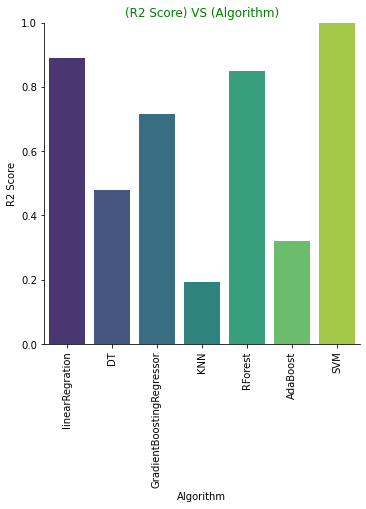

In [350]:

sns.catplot(x = 'Algorithm', y='R2 Score',data=car_metrix, kind='bar',height=5,palette='viridis')
plt.ylim(0.0,1.0)
plt.xticks(rotation='vertical')
plt.title('(R2 Score) VS (Algorithm)',loc='center',color='GREEN')
plt.show()

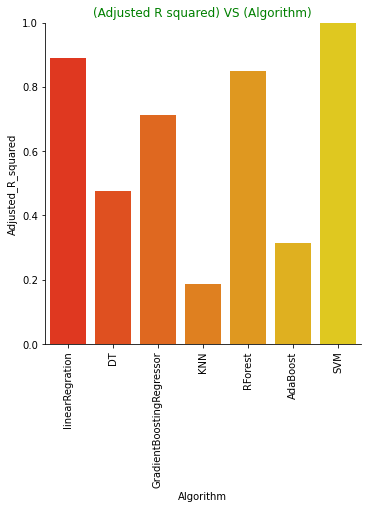

In [351]:

sns.catplot(x = 'Algorithm', y='Adjusted_R_squared',data=car_metrix, kind='bar',
            height=5,palette='autumn')
plt.ylim(0.0,1.0)
plt.xticks(rotation='vertical')
plt.title('(Adjusted R squared) VS (Algorithm)',loc='center',color='GREEN')
plt.show()